## Sesión 5- Paradoja de Monty Hall - Resuelto

En esta quinta sesión ilustraremos el *Teorema de Bayes*. Dicho teorema expresa la probabilidad condicional de un suceso aleatorio **A** dado otro suceso aleatorio **B**.
Para ello, se utilizará la *Paradoja de Monty Hall*. Esta paradoja está basada en un concurso de televisión estadounidense llamado *Let’s make a deal (Hagamos un trato)* y debe su nombre al presentador del programa. 



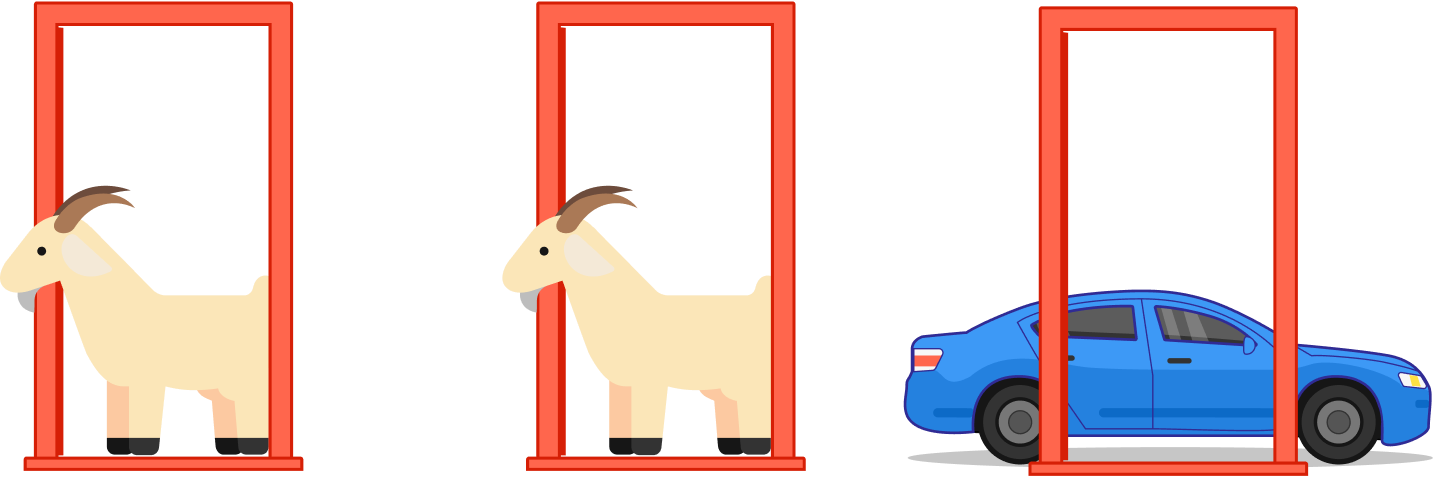

En el concurso hay tres puertas disponibles. Detrás de dos de las puertas hay una cabra y, en la tercera, un coche. El concursante debe elegir una puerta y el premio consiste en llevarse lo que está detrás de ella. Sin embargo, tras comunicar su decisión, el presentador del programa (que sabe dónde está el coche y dónde las cabras) abre una de las dos puertas que no han sido elegidas, mostrando una cabra. En ese momento, le da la oportunidad al concursante de cambiar de puerta o de mantener su elección inicial. 


Está demostrado que cambiar la elección inicial hace que la probabilidad de ganar el automóvil sea del 66%. Esto es contraintuitivo, porque al inicio del concurso las probabilidades eran del 33% (un coche detrás de una de las 3 puertas) y, después de que el presentador mostrara una cabra y sólo quedaran dos puertas, la intuición dice que la probabilidad es del 50% -quedan dos puertas: una esconde una cabra; la otra, un coche-. 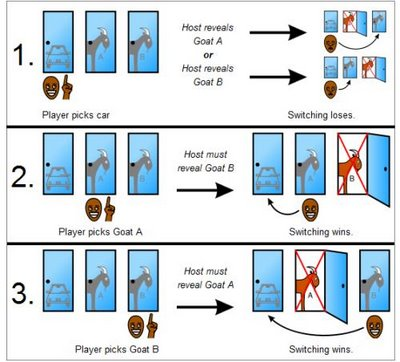

¿Cómo es esto posible? Al principio, la probabilidad de ganar era del 33% y, cuando el presentador revela una de las puertas en las que no había premio, quedan dos puertas, por lo que la probabilidad debería ser del 50%... ¿Por qué deberíamos cambiar nuestra elección inicial?


### Explicación matemática del problema

Inicialmente, las probabilidades de ganar eligiendo las puertas **1, 2 y 3** son: $P(1)=P(2)=P(3)=1/3$

Si el concursante elige la puerta 1, ¿cuál es la probabilidad de que el presentador abra la puerta **3**, sabiendo que el premio está detrás de la puerta **1,2 o 3**?


Si el premio está detrás de la puerta 1, el presentador puede abrir la puerta 3 o la puerta 2, porque ninguna de ellas tiene el premio. Por lo tanto, la probabilidad de que el presentador abra la puerta 3, sabiendo que el premio está detrás de la puerta 1 es $P(3|1)=1/2$


Si el premio está detrás de la puerta 2, el presentador abrirá la puerta 3 con total seguridad, porque la 1 ha sido elegida y la 2 contiene el premio. Por lo tanto, la probabilidad de que el presentador abra la puerta 3, sabiendo que el premio está detrás de la puerta 2 es $P(3|2)=1$


Si el premio está detrás de la puerta 3, el presentador abrirá la puerta 2 con total seguridad, porque la 1 ha sido elegida y la 3 contiene el premio. Por lo tanto, la probabilidad de que el presentador abra la puerta 3, sabiendo que el premio está detrás de la puerta 3 es $P(3|3)=0$



Ahora, vamos a suponer que el presentador abre la puerta 3. Si la puerta 3 no esconde el coche, ¿cómo de seguros podemos estar de que el coche está detrás de la puerta 2 (la que no ha elegido el concursante)? Las probabilidades vienen dadas por el teorema de Bayes para la probabilidad condicional.

$P(A_k|B)=\frac{P(B|A_k)P(A_k)}{\sum_i P(B|A_i)P(A_i)}$

Por lo tanto, aplicando la fórmula, obtenemos:

$P(2|3)=\frac{P(3|2)P(2)}{P(3|1)P(1)P(3|2)P(2)P(3|3)P(3)}=\frac{(1)(1/3)}{(1/2)(1/3)+(1)(1/3)+(0)(1/3)}=2/3$

Estamos calculando la probabilidad de éxito para la puerta 2, sabiendo que el presentador revela el contenido de la puerta 3 (que no esconde el coche) y el concursante eligió inicialmente la puerta 1. Por lo tanto, ¡las probabilidades de éxito son de 2/3 si cambiamos de puerta! 

En cambio, si nos quedamos con nuestra elección inicial, las probabilidades de éxito serían: 

$P(1|3)=\frac{P(3|1)P(1)}{P(3|1)P(1)P(3|2)P(2)P(3|3)P(3)}=\frac{(1/2)(1/3)}{(1/2)(1/3)+(1)(1/3)+(0)(1/3)}=1/3$

## Solución (no es la única, ¡hay muchas formas de hacerlo!)


In [1]:
import random

def un_intento(cambia_puerta, npuertas):
    """
    Simulamos una vez el problema de Monty Hall, cambiando o sin cambiar de puerta después de que el presentador
    revele una cabra detrás de una de las dos puertas no elegidas (cambia_puerta es True o False). 
    El coche está detrás de la puerta 1 (y el presentador lo sabe).
    """

    # Elegir una puerta al azar entre las n puertas disponibles
    puerta_elegida = random.randint(1, npuertas)
    # El siguiente bloque plantea qué es lo que pasa si se cambia de puerta
    if cambia_puerta:
        # El presentador muestra una cabra tras la elección inicial
        # Sabiendo que el premio está tras la puerta 1, el presentador abrirá la puerta 3
        # si el concursante ha elegido la puerta 2, o la puerta 2 si el concursante ha elegido las puertas 1 o 3.
        puerta_revelada = 3 if puerta_elegida==2 else 2
        # En este caso, el concursante deberá elegir una puerta de entre las 2 que quedan disponibles
        puertas_disponibles = [dnum for dnum in range(1,npuertas+1)
                                if dnum not in (puerta_elegida, puerta_revelada)]        
        puerta_elegida = random.choice(puertas_disponibles)

    # Ganas si la elección final coincide con la puerta 1 (True)
    return puerta_elegida == 1
    
    # Realizar varios intentos del problema de Monty Hall con n puertas,
    # cambiando y sin cambiar la elección inicial (cambia_puerta es True o False).
    # Obtenemos el número de veces que se ha ganado, es decir, cuántas veces la elección final ha sido la puerta 1.
    

def victorias_sin_cambio(nintentos, npuertas):
    cambia_puerta = False
    victorias = 0
    for i in range(nintentos):
        if un_intento(cambia_puerta, npuertas):
            victorias += 1
    print("Se ha llevado a cabo",nintentos,"veces el problema de Monty Hall con",npuertas,"puertas sin cambiar la elección inicial.")
    print("Se ha ganado",victorias,"veces.\nEsto representa un porcentaje de victoria del",round(100*victorias/nintentos,2),"%. La teoría predice un 33%\n")


def victorias_con_cambio(nintentos, npuertas):
    cambia_puerta = True
    victorias = 0
    for i in range(nintentos):
        if un_intento(cambia_puerta, npuertas):
            victorias += 1
    print("Se ha llevado a cabo",nintentos,"veces el problema de Monty Hall con",npuertas,"puertas cambiando la elección inicial.")
    print("Se ha ganado",victorias,"veces.\nEsto representa un porcentaje de victoria del",round(100*victorias/nintentos,2),"%. La teoría predice un 66%")


In [2]:
victorias_sin_cambio(10,3)
victorias_con_cambio(10,3)

Se ha llevado a cabo 10 veces el problema de Monty Hall con 3 puertas sin cambiar la elección inicial.
Se ha ganado 3 veces.
Esto representa un porcentaje de victoria del 30.0 %. La teoría predice un 33%

Se ha llevado a cabo 10 veces el problema de Monty Hall con 3 puertas cambiando la elección inicial.
Se ha ganado 7 veces.
Esto representa un porcentaje de victoria del 70.0 %. La teoría predice un 66%


In [3]:
victorias_sin_cambio(50,3)
victorias_con_cambio(50,3)

Se ha llevado a cabo 50 veces el problema de Monty Hall con 3 puertas sin cambiar la elección inicial.
Se ha ganado 16 veces.
Esto representa un porcentaje de victoria del 32.0 %. La teoría predice un 33%

Se ha llevado a cabo 50 veces el problema de Monty Hall con 3 puertas cambiando la elección inicial.
Se ha ganado 38 veces.
Esto representa un porcentaje de victoria del 76.0 %. La teoría predice un 66%


In [4]:
victorias_sin_cambio(150,3)
victorias_con_cambio(150,3)

Se ha llevado a cabo 150 veces el problema de Monty Hall con 3 puertas sin cambiar la elección inicial.
Se ha ganado 45 veces.
Esto representa un porcentaje de victoria del 30.0 %. La teoría predice un 33%

Se ha llevado a cabo 150 veces el problema de Monty Hall con 3 puertas cambiando la elección inicial.
Se ha ganado 93 veces.
Esto representa un porcentaje de victoria del 62.0 %. La teoría predice un 66%


In [5]:
victorias_sin_cambio(300,3)
victorias_con_cambio(300,3)

Se ha llevado a cabo 300 veces el problema de Monty Hall con 3 puertas sin cambiar la elección inicial.
Se ha ganado 102 veces.
Esto representa un porcentaje de victoria del 34.0 %. La teoría predice un 33%

Se ha llevado a cabo 300 veces el problema de Monty Hall con 3 puertas cambiando la elección inicial.
Se ha ganado 188 veces.
Esto representa un porcentaje de victoria del 62.67 %. La teoría predice un 66%
